In [1]:
import glob
import chess_SL_E6_lib as lib
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import chess
import numpy as np

In [2]:
MODEL_NUM = 6
MODEL_VERSION = 3

path = "../Data/DataTrain"

csv_files1 = glob.glob(f'{path}/Chess_Jan_g*') + glob.glob(f'{path}/Chess_Jan_h*') + glob.glob(f'{path}/Chess_Jan_i*') + glob.glob(f'{path}/Chess_Jan_j*') + glob.glob(f'{path}/Chess_Jan_k*')
csv_files2 = glob.glob(f'{path}/Chess_Jan_e*') + glob.glob(f'{path}/Chess_Jan_f*')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Create a dataset
dataset1 = lib.ChessIterableDataset(csv_files1, chunksize = 50000)
dataset2 = lib.ChessIterableDataset(csv_files2, chunksize = 50000)

# Create a data loader
train_data_loader = DataLoader(dataset1, batch_size = 25000)
val_data_loader = DataLoader(dataset2, batch_size = 25000)

In [4]:
model = torch.load(f'models_EL/model_E6-2.pth', map_location=device)
model = model.to(device)

criterion = nn.L1Loss() # nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.035, momentum=0.9)

optimizer = optim.Adam(model.parameters(), lr=0.006)

# Train the model
training_loss_history, validation_loss_history = lib.train(model, train_data_loader, val_data_loader, criterion, optimizer, num_epochs=50)

Begin Training!
Epoch 1/50, Training Loss: 1.67185, Validation Loss: 1.54750
Epoch 2/50, Training Loss: 1.55505, Validation Loss: 1.61014
Epoch 3/50, Training Loss: 1.54283, Validation Loss: 1.52000
Epoch 4/50, Training Loss: 1.53891, Validation Loss: 1.55784
Epoch 5/50, Training Loss: 1.51827, Validation Loss: 1.52144
Epoch 6/50, Training Loss: 1.51664, Validation Loss: 1.52949
Epoch 7/50, Training Loss: 1.50616, Validation Loss: 1.52144
Epoch 8/50, Training Loss: 1.51199, Validation Loss: 1.60127
Epoch 9/50, Training Loss: 1.50176, Validation Loss: 1.56591
Epoch 10/50, Training Loss: 1.48865, Validation Loss: 1.64281
Epoch 11/50, Training Loss: 1.48953, Validation Loss: 1.55366
Epoch 12/50, Training Loss: 1.48910, Validation Loss: 1.54656
Epoch 13/50, Training Loss: 1.46917, Validation Loss: 1.54048
Epoch 14/50, Training Loss: 1.46387, Validation Loss: 1.57470
Epoch 15/50, Training Loss: 1.47416, Validation Loss: 1.63998
Epoch 16/50, Training Loss: 1.45956, Validation Loss: 1.58847
E

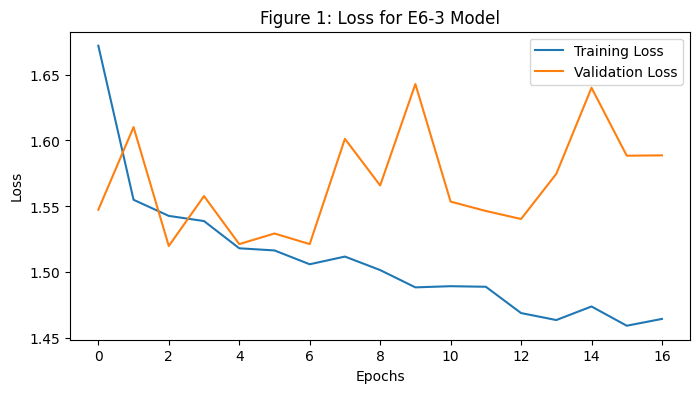

In [6]:
torch.save(model, f'model_E{MODEL_NUM}-{MODEL_VERSION}.pth')

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(training_loss_history, label = 'Training Loss')
plt.plot(validation_loss_history, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.ylim(0, None)
plt.title(f'Figure 1: Loss for E{MODEL_NUM}-{MODEL_VERSION} Model')
plt.legend()
plt.savefig(f'Loss_E{MODEL_NUM}-{MODEL_VERSION}.png')
plt.show()

In [ ]:
import pickle

pickle.dump(training_loss_history, open(f'pickle/training_loss_history_E{MODEL_NUM}-{MODEL_VERSION}.pkl', 'wb'))
pickle.dump(validation_loss_history, open(f'pickle/validation_loss_history_E{MODEL_NUM}-{MODEL_VERSION}.pkl', 'wb'))